In [1]:
import pandas as pd
import spacy
import numpy as np


/Users/aaryanshah/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
file_path = '/Users/aaryanshah/Oncampus-Job/NLP_Gal/data/CVC_Combined_Scores_BERT_and_Rule_based.csv'
clusters_gal_df = pd.read_csv(file_path)

clusters_gal_df

,Index,Firm/Fund,Company,Business Description,Primary Industry (CIQ/GICS),Topic Tags,Geography,BERT_Score,Rule_Based_Score,Final_Score
0,1,BP p.l.c.,Abu Dhabi Marine Operating Company,Abu Dhabi Marine Operating Company engages in ...,Oil and Gas Exploration and Production,NaN,Africa / Middle East,1,1,1
1,2,BP p.l.c.,Airport Fuel Services Pty. Limited,NaN,Automotive Retail,NaN,Asia-Pacific,3,1,3
2,3,BP p.l.c.,Aker BP ASA,"Aker BP ASA explores for, develops, and produc...",Oil and Gas Exploration and Production,NaN,Europe,1,1,1
3,4,BP p.l.c.,Alaska Lng Project LLC,Alaska LNG Project LLC provides phone support ...,NaN,NaN,United States and Canada,4,1,4
4,5,BP p.l.c.,Alyeska Pipeline Service Company,"Alyeska Pipeline Service Company designs, cons...",Oil and Gas Storage and Transportation,"Marine Transportation, Marine Industries",United States and Canada,1,1,1
...,...,...,...,...,...,...,...,...,...,...
945,946,TotalEnergies SE,IntouchSA,IntouchSA develops an electronic device that a...,Electronic Equipment and Instruments,"Online Payments, Fintech",Africa / Middle East,4,1,4
946,947,TotalEnergies SE,Orbital Marine Power Limited,Orbital Marine Power Limited develops and comm...,Heavy Electrical Equipment,NaN,Europe,3,5,5
947,948,TotalEnergies SE,Joint Stock Company Yamal LNG,Joint Stock Company Yamal LNG develops and ope...,Oil and Gas Exploration and Production,NaN,Europe,1,1,1
948,949,TotalEnergies SE,"Amyris, Inc.","Amyris, Inc. operates as a biotechnology compa...",Specialty Chemicals,"Vaccines, COVID-19, Alternative Protein, Ma...",United States and Canada,4,5,5


In [4]:
clusters_gal_df.columns

Index(['Index', 'Firm/Fund', 'Company', 'Business Description',
       'Primary Industry (CIQ/GICS)', 'Topic Tags', 'Geography', 'BERT_Score',
       'Rule_Based_Score', 'Final_Score'],
      dtype='object')

In [12]:
# Combine all leftovers columns into a single list
leftovers_data = clusters_gal_df['Business Description']

# Display the first few items from the combined leftovers list to verify
leftovers_data[:10], len(leftovers_data)

(0    Abu Dhabi Marine Operating Company engages in ...
 1                                                  NaN
 2    Aker BP ASA explores for, develops, and produc...
 3    Alaska LNG Project LLC provides phone support ...
 4    Alyeska Pipeline Service Company designs, cons...
 5    Angola LNG Supply Services LLC is headquartere...
 6    ARG mbH & Co. KG operates and maintains pipeli...
 7    Bisn Holdings Limited manufactures cutting and...
 8                                                  NaN
 9    Caesar Oil Pipeline Company, LLC constructs an...
 Name: Business Description, dtype: object,
 950)

In [13]:
# Filter out non-text entries from the leftovers (assuming they should all be strings)
leftovers_text_data = [item for item in leftovers_data if isinstance(item, str)]

In [14]:
leftovers_text_data[:10], len(leftovers_text_data)

(['Abu Dhabi Marine Operating Company engages in the exploration, development, and production of oil and gas from the offshore areas of the Emirate of Abu Dhabi. It processes crude oil; and stores and exports oil and gas worldwide. Abu Dhabi Marine Operating Company was formerly known as Abu Dhabi Marine Areas Ltd. and changed its name to Abu Dhabi Marine Operating Company in 1977. The company was founded in 1954 and is based in Abu Dhabi, United Arab Emirates. Abu Dhabi Marine Operating Company operates as a subsidiary of Abu Dhabi National Oil Company. As of November 28, 2019, Abu Dhabi Marine Operating Company is in liquidation.',
  'Aker BP ASA explores for, develops, and produces oil and gas on the Norwegian Continental Shelf. It operates Alvheim, Edvard Grieg, Ivar Aasen, Valhall, Skarv and Ula fields. The company was formerly known as Det norske oljeselskap ASA and changed its name to Aker BP ASA in October 2016. Aker BP ASA was founded in 2001 and is headquartered in Fornebu, N

In [15]:
leftovers_text_data

['Abu Dhabi Marine Operating Company engages in the exploration, development, and production of oil and gas from the offshore areas of the Emirate of Abu Dhabi. It processes crude oil; and stores and exports oil and gas worldwide. Abu Dhabi Marine Operating Company was formerly known as Abu Dhabi Marine Areas Ltd. and changed its name to Abu Dhabi Marine Operating Company in 1977. The company was founded in 1954 and is based in Abu Dhabi, United Arab Emirates. Abu Dhabi Marine Operating Company operates as a subsidiary of Abu Dhabi National Oil Company. As of November 28, 2019, Abu Dhabi Marine Operating Company is in liquidation.',
 'Aker BP ASA explores for, develops, and produces oil and gas on the Norwegian Continental Shelf. It operates Alvheim, Edvard Grieg, Ivar Aasen, Valhall, Skarv and Ula fields. The company was formerly known as Det norske oljeselskap ASA and changed its name to Aker BP ASA in October 2016. Aker BP ASA was founded in 2001 and is headquartered in Fornebu, Nor

In [16]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Make sure to download the required nltk resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aaryanshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aaryanshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Define the preprocessing function with necessary imports
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the text data
preprocessed_leftovers = [preprocess_text(item) for item in leftovers_text_data]

# Display the first few preprocessed leftovers
preprocessed_leftovers[:10], len(preprocessed_leftovers)

(['abu dhabi marine operating company engages exploration development production oil gas offshore area emirate abu dhabi process crude oil store export oil gas worldwide abu dhabi marine operating company formerly known abu dhabi marine area ltd changed name abu dhabi marine operating company 1977 company founded 1954 based abu dhabi united arab emirate abu dhabi marine operating company operates subsidiary abu dhabi national oil company november 28 2019 abu dhabi marine operating company liquidation',
  'aker bp asa explores develops produce oil gas norwegian continental shelf operates alvheim edvard grieg ivar aasen valhall skarv ula field company formerly known det norske oljeselskap asa changed name aker bp asa october 2016 aker bp asa founded 2001 headquartered fornebu norway',
  'alaska lng project llc provides phone support service offer free domain setup service',
  'alyeska pipeline service company design construct operates maintains transalaska pipeline system transportation 

In [18]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
import numpy as np

# Load the BERT model for embeddings
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the simplified preprocessed leftovers
leftovers_embeddings = bert_model.encode(preprocessed_leftovers)

# Cluster the embeddings using DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=4, metric='cosine')
clusters = dbscan.fit_predict(leftovers_embeddings)

# Group the words by cluster
clustered_capabilities = {}
for i, word in enumerate(preprocessed_leftovers):
    cluster_label = clusters[i]
    if cluster_label not in clustered_capabilities:
        clustered_capabilities[cluster_label] = []
    clustered_capabilities[cluster_label].append(word)

# Output the clusters
print("Clusters of Filtered Leftovers:")
for label, cluster_keywords in clustered_capabilities.items():
    print(f"Cluster {label}: {cluster_keywords}")


Clusters of Filtered Leftovers:
Cluster 0: ['abu dhabi marine operating company engages exploration development production oil gas offshore area emirate abu dhabi process crude oil store export oil gas worldwide abu dhabi marine operating company formerly known abu dhabi marine area ltd changed name abu dhabi marine operating company 1977 company founded 1954 based abu dhabi united arab emirate abu dhabi marine operating company operates subsidiary abu dhabi national oil company november 28 2019 abu dhabi marine operating company liquidation', 'alyeska pipeline service company design construct operates maintains transalaska pipeline system transportation oil transport crude oil marine industry company founded 1970 based anchorage alaska additional office fairbanks valdez alaska', 'angola lng supply service llc headquartered houston texas', 'caesar oil pipeline company llc construct operates oil pipeline transport hydrocarbon caesar oil pipeline company llc based united state caesar oil

In [23]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assume leftovers_embeddings is already defined
X = leftovers_embeddings

# Define the parameter range
eps_values = np.arange(0.1, 1.0, 0.1)  # Adjust the range based on your dataset
min_samples_values = range(2, 10)  # Commonly small ranges are sufficient

# To store the best configuration
best_eps = None
best_min_samples = None
best_silhouette = -1  # Start with a very low silhouette score

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbscan.fit_predict(X)
        # Calculate the number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:  # Silhouette score is only valid if there are clusters
            silhouette = silhouette_score(X, labels)
            print(f'For eps={eps}, min_samples={min_samples}, clusters={n_clusters}, noise={n_noise}, silhouette={silhouette}')
            
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette={best_silhouette}")


For eps=0.1, min_samples=2, clusters=51, noise=938, silhouette=-0.06272353231906891
For eps=0.2, min_samples=2, clusters=97, noise=829, silhouette=-0.020433079451322556
For eps=0.2, min_samples=3, clusters=11, noise=1001, silhouette=-0.074820876121521
For eps=0.2, min_samples=4, clusters=5, noise=1019, silhouette=-0.0588698610663414
For eps=0.2, min_samples=5, clusters=2, noise=1031, silhouette=-0.04464653134346008
For eps=0.30000000000000004, min_samples=2, clusters=133, noise=688, silhouette=0.024367431178689003
For eps=0.30000000000000004, min_samples=3, clusters=41, noise=872, silhouette=-0.05949185788631439
For eps=0.30000000000000004, min_samples=4, clusters=18, noise=951, silhouette=-0.06722503155469894
For eps=0.30000000000000004, min_samples=5, clusters=7, noise=997, silhouette=-0.0674290657043457
For eps=0.30000000000000004, min_samples=6, clusters=2, noise=1026, silhouette=-0.050402894616127014
For eps=0.4, min_samples=2, clusters=138, noise=430, silhouette=0.035714458674192

In [26]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the new data file
new_data_df = pd.read_csv('/Users/aaryanshah/Oncampus-Job/NLP_Gal/data/CVC_Combined_Scores_BERT_and_Rule_based.csv')

# Define your preprocessing function (as defined earlier)
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
new_data_df['processed_text'] = new_data_df['Business Description'].apply(preprocess_text)


In [28]:
# Load existing clusters (I assume embeddings or cluster identifiers)
clusters_df = pd.read_excel('/Users/aaryanshah/Oncampus-Job/NLP_Gal/clustering/Clusters_gal.xlsx')
# Assuming clusters are represented by some form of embedding or labels

# Load BERT Model
model = SentenceTransformer('all-MiniLM-L6-v2')


/Users/aaryanshah/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [29]:
# Embed the preprocessed text
embeddings = model.encode(new_data_df['processed_text'].tolist())


In [ ]:
# Assuming we have cluster centroids or need to calculate them
# Here you would use your clustering logic, e.g., calculating cosine similarity to each cluster centroid
# For illustration, assuming you have a function or method to determine the closest cluster

# Define a function to find the closest cluster (this is a placeholder)
def find_closest_cluster(embedding, clusters):
    # Example placeholder logic
    return np.argmax(cosine_similarity([embedding], clusters))  # Assuming 'clusters' are centroids

# Assign clusters
new_data_df['cluster'] = [find_closest_cluster(embed, cluster_embeddings) for embed in embeddings]


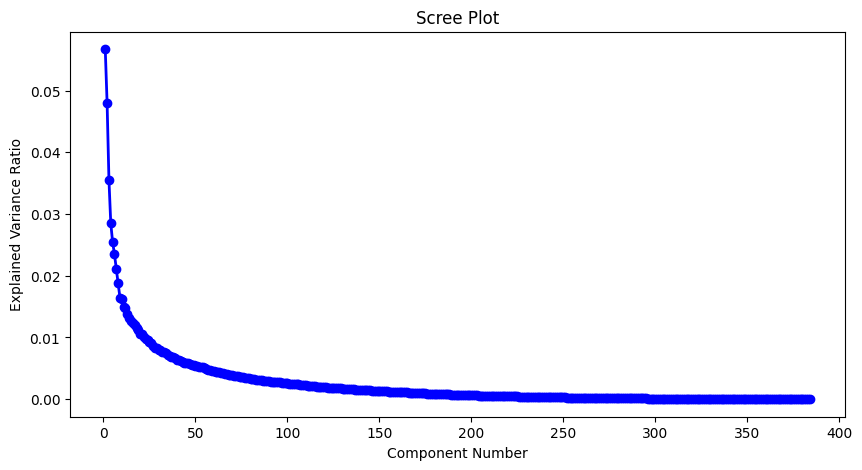

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your data matrix
pca = PCA(n_components=min(embeddings.shape))
pca.fit(embeddings)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk


In [33]:
def preprocess_text(text):
    # Convert text to string and lower case
    text = str(text).lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    
    # Load stopwords and lemmatizer
    try:
        stop_words = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()
    except LookupError:
        nltk.download('stopwords')
        nltk.download('wordnet')
        stop_words = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


In [34]:
# Load the business descriptions dataset
new_data_df = pd.read_csv('/Users/aaryanshah/Oncampus-Job/NLP_Gal/data/CVC_Combined_Scores_BERT_and_Rule_based.csv')

# Apply preprocessing
new_data_df['processed_text'] = new_data_df['Business Description'].apply(preprocess_text)


In [35]:
# Load the Sentence Transformer model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(new_data_df['processed_text'].tolist())

# Apply PCA to reduce dimensionality based on Scree plot analysis
pca = PCA(n_components=20)  # Adjust based on Scree plot
reduced_embeddings = pca.fit_transform(embeddings)


/Users/aaryanshah/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [36]:
def find_closest_cluster(embedding, centroids):
    # Calculate cosine similarity between the embedding and each centroid
    similarities = cosine_similarity([embedding], centroids)
    # Return the index of the centroid with the highest similarity
    return np.argmax(similarities)


In [37]:
from sklearn.cluster import KMeans

# Example: Assuming 'embeddings' is your full set of data points
# and you know the optimal number of clusters (e.g., from previous analysis)
num_clusters = 10  # Adjust based on previous determination
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Calculate centroids directly from KMeans object
centroids = kmeans.cluster_centers_


/Users/aaryanshah/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [39]:
from sklearn.cluster import DBSCAN

# Assuming 'embeddings' contains your preprocessed and possibly dimensionally reduced data
dbscan = DBSCAN(eps=0.4, min_samples=4, metric='cosine')  # Tweak parameters as necessary
db_labels = dbscan.fit_predict(embeddings)

# Now db_labels contains the cluster labels for each point in your dataset


In [40]:
def calculate_centroids(data, labels):
    unique_labels = set(labels)
    centroids = []
    for label in unique_labels:
        if label != -1:  # Exclude noise if using DBSCAN
            # Calculate mean for each cluster
            points = data[labels == label]
            centroid = np.mean(points, axis=0)
            centroids.append(centroid)
    return np.array(centroids)

# Assume 'embeddings' are your data points and 'db_labels' are from DBSCAN or similar
centroids = calculate_centroids(embeddings, db_labels)
